 ## Introduction
Defining the "best" neighborhood in Pittsburgh is a very subjective process. To help eliminate some of the human bias, an analytical approach can be used.

We used three sub-metrics to help determine this, quality of life, assaults, and housing-economics.

To accomplish this, we needed various data sets:
* Quality of Life: Neighborhoods with SNAP data
* Assaults: 911 EMS Dispatches and Population by Municipality
* Housing-Economics: Median house data

### Setup
We can read the csvs we created from the earlier sub-metrics. These contain the rankings for each neighborhood in their respective datasets

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

qol_rankings = pd.read_csv("../rankings/qol.csv")
assault_rankings = pd.read_csv("../rankings/assaults.csv")
housing_rankings = pd.read_csv("../rankings/housing.csv") 

### Final Rankings
By using the rankings from each sub-metric, we can form a final ranking. Neigborhoods with a high placement (low ranking), get a higher score

In [26]:
final_rankings = {}

# Low rankings (close to first place) should have high scores
def get_score_from_ranking(ranking):
    return 200 - ranking

for neighborhood, ranking in zip(qol_rankings['Neighborhood'], qol_rankings['Ranking']):
    final_rankings[neighborhood] = get_score_from_ranking(ranking)

for neighborhood, ranking in zip(assault_rankings['Neighborhood'], assault_rankings['Ranking']):
    if final_rankings.get(neighborhood):
        final_rankings[neighborhood] += get_score_from_ranking(ranking)
    else:
        final_rankings[neighborhood] = get_score_from_ranking(ranking)


for neighborhood, ranking in zip(housing_rankings['Neighborhood'], housing_rankings['Ranking']):
    if final_rankings.get(neighborhood):
        final_rankings[neighborhood] += get_score_from_ranking(ranking)
    else:
        final_rankings[neighborhood] = get_score_from_ranking(ranking)

# Finally, sort the final rankings. A higher final score means a higher placement
sorted_final_scores = dict(sorted(final_rankings.items(), key=lambda item: item[1], reverse=True))

KeyError: 'Neighborhood'

## Best neighborhoods; A graph

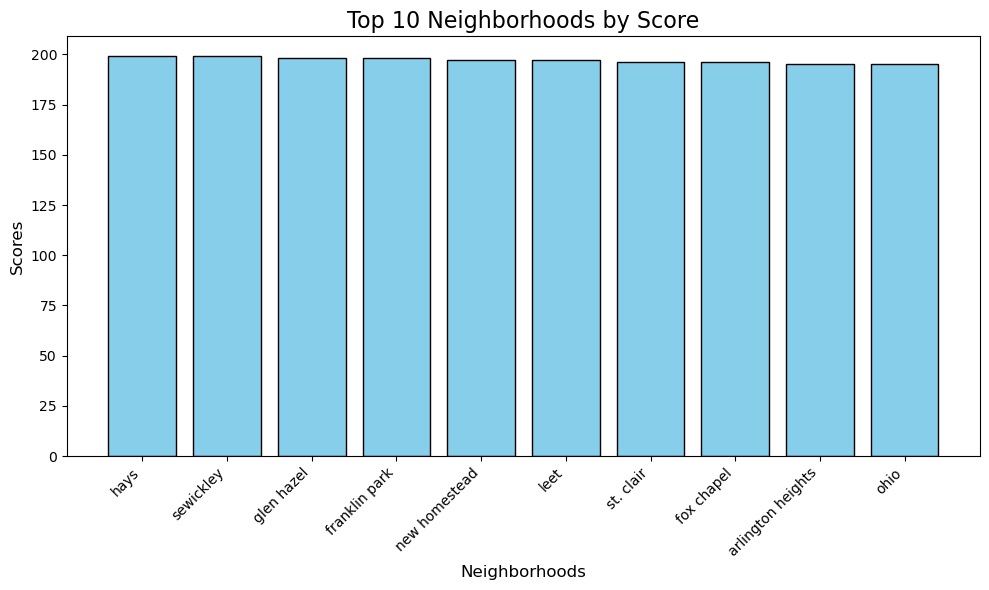

In [20]:
top_10_scores = dict(list(sorted_final_scores.items())[:10])

neighborhoods = list(top_10_scores.keys())
scores = list(top_10_scores.values())

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(neighborhoods, scores, color='skyblue', edgecolor='black')
plt.title('Top 10 Neighborhoods by Score', fontsize=16)
plt.xlabel('Neighborhoods', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for readability

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# The Best Neighborhood
As seen from the data, the best neighborhood, from an analytical approach, is the neighborhood of Hays!


## Conclusions
* Jack Carluccio - Given that I do not live in Pittsburgh, I do not have a solid opinion on the best neighborhood. However, I would pick downtown Pittsburgh, because I love the city. Although, my metric of quality of life would directly punish downtown, because it uses population density as a bad metric."
* Jack Peters - I would pick Licoln Place to be the best neighborhood because it performs well in our quality of life metric, has a good median home value, and only averages 5 assault dispatches per 1,000 people per year which is very good for a neighborhood with a medium sized population near to the bulk of Pittsburgh.
* Tina Tran - I would pick Squirrel Hill North to be the best neighborhood in Pittsburgh. As somenoe who grew up in Pittsburgh I can confidently say that this aligns with my own personal opinion and my dataset. Squirrel hill not only has one of the best economies but also has plenty of shops and restaurants to spend your day at which makes Squirrel Hill North my favorite in Pittsburgh.